In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlretrieve

In [2]:
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
urlretrieve(iris)

('/tmp/tmpijxke8hj', <http.client.HTTPMessage at 0x7f6d0fd67d90>)

In [3]:
train = pd.read_csv(iris, sep=',')
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "Class"]
train.columns = attributes

In [4]:
train

,sepal_length,sepal_width,petal_length,petal_width,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
x = train.drop("Class",axis=1)
y = train['Class']

In [6]:
y.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Class, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [8]:
# splitting the dataset into train and test dataset with 4:1 ratio (80%-20%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .1, random_state = 26,stratify=y)

## Training on different algorithms

### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()
# Pass training data into model
lreg.fit(x_train, y_train)

LogisticRegression()

In [10]:
# Getting prediciton on x_test
y_pred_lreg = lreg.predict(x_test)

In [11]:
# Scoring our model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*50)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))


# Accuracy of our model
print('--'*50)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,8)
print('Accuracy = ', logreg_accuracy,'%')


Logistic Regression


Confusion Matrix
[[5 0 0]
 [0 5 0]
 [0 0 5]]
----------------------------------------------------------------------------------------------------
Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00         5
 Iris-virginica       1.00      1.00      1.00         5

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15

----------------------------------------------------------------------------------------------------
Accuracy =  100.0 %


**We have a accuracy of 99.90%**

### LINEAR SUPPORT VECTOR CLASSIFIER

In [12]:
%%time
from sklearn.svm import SVC
# Instantiate the model
svc = SVC()
# Fit the model on training data
svc.fit(x_train, y_train)

CPU times: user 3.18 ms, sys: 24 µs, total: 3.2 ms
Wall time: 2.86 ms


SVC()

In [13]:
# Getting the predictions for x_test
y_pred_svc = svc.predict(x_test)

In [14]:
print('Support Vector Classifier')
print('\n')
# Confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svc))
print('--'*50)

# Classification report
print('Classification Report')
print(classification_report(y_test, y_pred_svc))

# Accuracy
print('--'*50)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc)*100,8)
print('Accuracy = ', svc_accuracy,'%')

Support Vector Classifier


Confusion Matrix
[[5 0 0]
 [0 5 0]
 [0 0 5]]
----------------------------------------------------------------------------------------------------
Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00         5
 Iris-virginica       1.00      1.00      1.00         5

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15

----------------------------------------------------------------------------------------------------
Accuracy =  100.0 %


### K-NEAREST NEIGHBORS

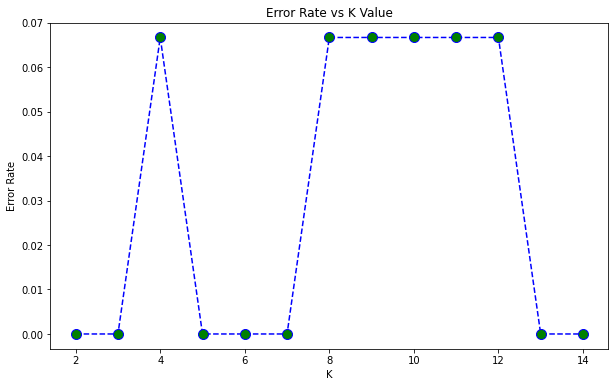

CPU times: user 293 ms, sys: 183 ms, total: 475 ms
Wall time: 291 ms


In [15]:
%%time
from sklearn.neighbors import KNeighborsClassifier

# in knn we need to select a value of nearest neighbour, for now lets use a for loop. If accuarcy
# is better than other models then we would search for optimal parameter

error_rate = []

for i in range (2,15):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot error rate
plt.figure(figsize = (10,6))
plt.plot(range(2,15), error_rate, color = 'blue', linestyle = '--', marker = 'o', 
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [16]:
# now using above data to train with n_neighbors having least error rate

n_value = 0
min_error = float('inf')
for idx,error in enumerate(error_rate):
    if min_error>error:
        min_error=error
        n_value=idx+2

knn = KNeighborsClassifier(n_neighbors = n_value)
# Fit new KNN on training data
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [17]:
# Predict KNN
y_pred_knn_op = knn.predict(x_test)

In [18]:
print('K-Nearest Neighbors(KNN)')
print('k =',n_value)

# Confusion Matrix
print('\n')
print(confusion_matrix(y_test, y_pred_knn_op))

# Classification Report
print('--'*50)
print('Classfication Report',classification_report(y_test, y_pred_knn_op))

# Accuracy
print('--'*50)
knn_op_accuracy =round(accuracy_score(y_test, y_pred_knn_op)*100,8)
print('Accuracy = ',knn_op_accuracy,'%')

K-Nearest Neighbors(KNN)
k = 2


[[5 0 0]
 [0 5 0]
 [0 0 5]]
----------------------------------------------------------------------------------------------------
Classfication Report                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00         5
 Iris-virginica       1.00      1.00      1.00         5

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15

----------------------------------------------------------------------------------------------------
Accuracy =  100.0 %


### RANDOM FOREST

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Create model object
rfc = RandomForestClassifier(n_estimators = 250,n_jobs=-1)
# Fit model to training data
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)

In [20]:
print('Random Forest')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_rfc))

# Classification report
print('--'*50)
print('Classification Report')
print(classification_report(y_test, y_pred_rfc))

# Accuracy
print('--'*50)
rf_accuracy = round(accuracy_score(y_test, y_pred_rfc)*100,8)
print('Accuracy = ', rf_accuracy,'%')

Random Forest


Confusion Matrix
[[5 0 0]
 [0 5 0]
 [0 0 5]]
----------------------------------------------------------------------------------------------------
Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00         5
 Iris-virginica       1.00      1.00      1.00         5

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15

----------------------------------------------------------------------------------------------------
Accuracy =  100.0 %


### XGBoost Classifier

In [21]:
from xgboost import XGBClassifier

# Create model object
xgb = XGBClassifier(n_jobs=-1)

# Fit model to training data
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:39:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [22]:
print('XGBoost Classifer')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_xgb))

# Classification report
print('--'*50)
print('Classification Report')
print(classification_report(y_test, y_pred_xgb))

# Accuracy
print('--'*50)
xgb_accuracy = round(accuracy_score(y_test, y_pred_xgb)*100,8)
print('Accuracy = ', xgb_accuracy,'%')

XGBoost Classifer


Confusion Matrix
[[5 0 0]
 [0 5 0]
 [0 0 5]]
----------------------------------------------------------------------------------------------------
Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      1.00      1.00         5
 Iris-virginica       1.00      1.00      1.00         5

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15

----------------------------------------------------------------------------------------------------
Accuracy =  100.0 %


In [23]:
models = pd.DataFrame({
     'Model': ['Logistic Regression', 'Linear SVC', 
               'K-Nearest Neighbors', 'Random Forest','XGBoost Classifier'],
    'Score': [logreg_accuracy, svc_accuracy, 
               knn_op_accuracy, rf_accuracy,xgb_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,100.0
1,Linear SVC,100.0
2,K-Nearest Neighbors,100.0
3,Random Forest,100.0
4,XGBoost Classifier,100.0
